In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
data = pd.read_csv('/content/creditcard.csv')
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [4]:
x = data.drop('Class', axis=1)
y = data['Class']
#

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
valid = valid.sample(len(fraud))
balanced_data = pd.concat([fraud, valid])
balanced_data = balanced_data.sample(frac=1)
print(fraud.shape, valid.shape)


(204, 31) (204, 31)


In [6]:
x_balanced = balanced_data.drop('Class', axis=1)
y_balanced = balanced_data['Class']
x_train, x_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(x_test)

In [9]:
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        48
         1.0       1.00      0.91      0.95        34

    accuracy                           0.96        82
   macro avg       0.97      0.96      0.96        82
weighted avg       0.97      0.96      0.96        82

Confusion matrix:
 [[48  0]
 [ 3 31]]


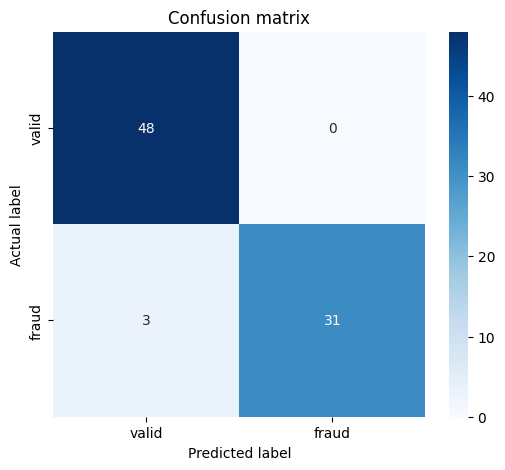

In [11]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues",xticklabels=["valid","fraud"],yticklabels=["valid","fraud"])
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

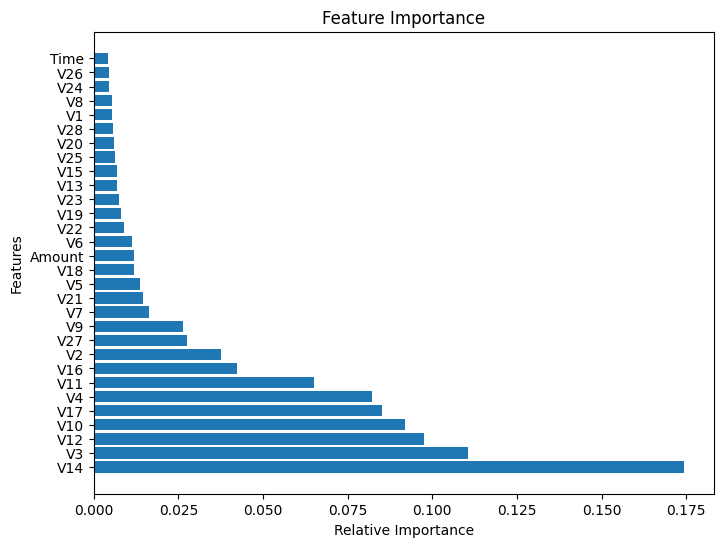

In [12]:
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]
features = x.columns
plt.figure(figsize=(8,6))
plt.title("Feature Importance")
plt.barh(range(x.shape[1]),importances[indices])
plt.yticks(range(x.shape[1]),[features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.ylabel("Features")
plt.show()